In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

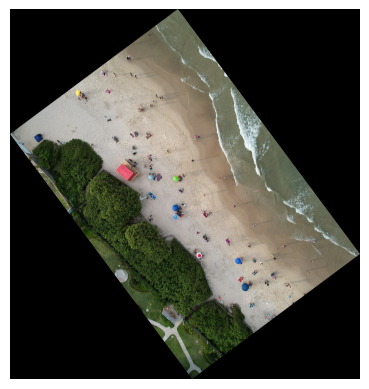

In [2]:
img = cv2.imread('DJI_0128.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)
plt.show()

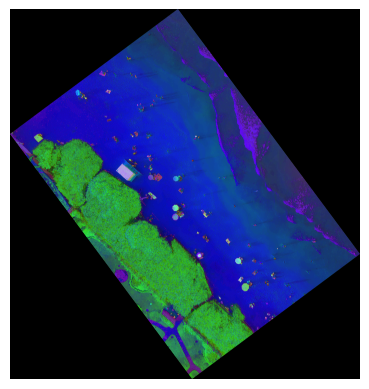

In [3]:
# HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.axis("off")
plt.imshow(hsv)
plt.show()

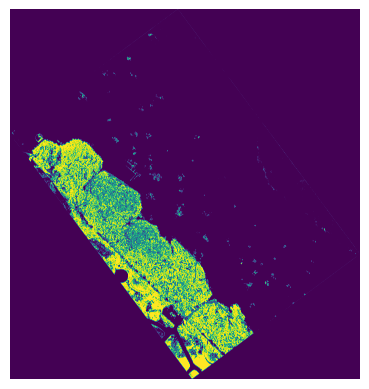

In [4]:
# vegetação
lower_veg = np.array([0, 40, 30])
upper_veg = np.array([170, 255, 90])

mask_veg = cv2.inRange(hsv, lower_veg, upper_veg)
plt.axis("off")
plt.imshow(mask_veg)
plt.show()


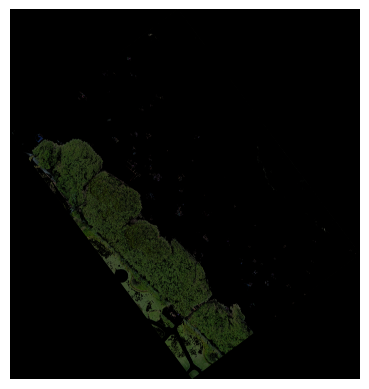

In [5]:
# Bitwise-AND máscara sobre a imagem original
vegetacao = cv2.bitwise_and(img,img, mask= mask_veg)
plt.axis("off")
plt.imshow(vegetacao)
plt.show()

In [6]:
# área em metros da vegetação a imagem é uma geotiff com 0.016m/pixel
areavegetacao = np.sum(mask_veg)/255*0.016*0.016
areavegetacao

987.969792

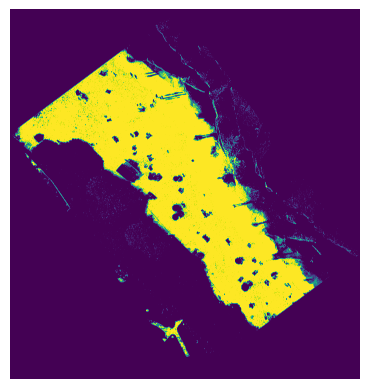

In [7]:
# areia
lower_areia = np.array([0, 0, 145])
upper_areia = np.array([180, 85, 255])

# adicione uma segunda mascara que remova a cor branca
lower_white = np.array([65, 0, 0])
upper_white = np.array([180, 255, 255])

mask_white = cv2.inRange(hsv, lower_white, upper_white)
mask_areia_base = cv2.inRange(hsv, lower_areia, upper_areia)

#subgrai da máscara da areia
mask_areia = cv2.subtract(mask_areia_base, mask_white)

plt.axis("off")
plt.imshow(mask_areia)
plt.show()


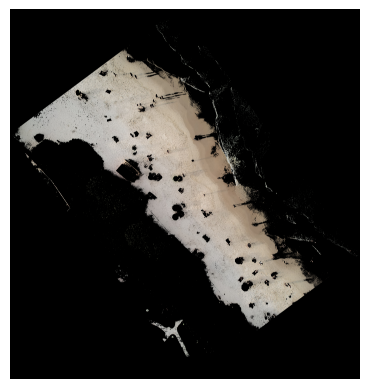

In [8]:
# Bitwise-AND máscara sobre a imagem original
areia = cv2.bitwise_and(img,img, mask= mask_areia)
plt.axis("off")
plt.imshow(areia)
plt.show()

In [9]:
# área em metros da vegetação a imagem é uma geotiff com 0.016m/pixel
areaareia = np.sum(mask_areia)/255*0.016*0.016
areaareia

2241.2871680000003